## 영화 리뷰분석
- IMDB 데이터 활용

In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.imdb import load_data
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비

In [75]:
(X_train, y_train), (X_test, y_test) = load_data()

In [76]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [77]:
# print(X_train[n]) for문
# for idx in range(len(X_train)):
for idx in range(2): # 2개만
    print(f'[{idx}] - {y_train[idx]}]\n{X_train[idx]}')
    print('--'*30)

[0] - 1]
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
---------------------------

## [2] 학습용 데아터 변환
- keras에서 이미 대부분의 전처리가 끝난 데이터
- 길이 조정이 필요 => 패딩(Padding)

In [78]:
# [2-1] 데이터별 길이 결정

In [79]:
len_idx=[]
for idx in X_train:
    len_idx.append(len(idx))

min(len_idx), max(len_idx), sum(len_idx)/25000

(11, 2494, 238.71364)

{'whiskers': [<matplotlib.lines.Line2D at 0x226015b10a0>,
 'caps': [<matplotlib.lines.Line2D at 0x226016207f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x226015bf610>],
 'medians': [<matplotlib.lines.Line2D at 0x22601620a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x22601620250>],
 'means': []}

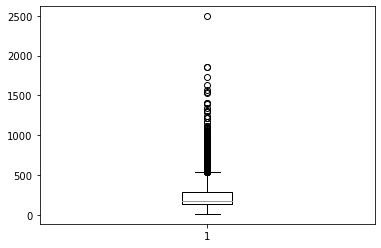

In [80]:
plt.boxplot(len_idx)

In [81]:
all_length=np.array([ len(x) for x in X_train])
all_length.mean(), all_length.std(), all_length.min(), all_length.max()

(238.71364, 176.49367364852034, 11, 2494)

(array([1.7598e+04, 5.3690e+03, 1.4070e+03, 5.1700e+02, 9.4000e+01,
        7.0000e+00, 5.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  11. ,  259.3,  507.6,  755.9, 1004.2, 1252.5, 1500.8, 1749.1,
        1997.4, 2245.7, 2494. ]),
 <BarContainer object of 10 artists>)

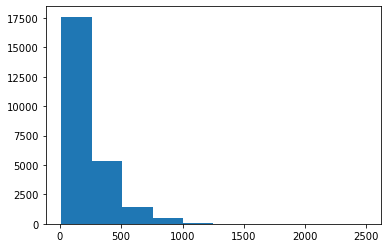

In [82]:
plt.hist(all_length)

In [83]:
# [2-2] 데이터별 길이 변경

In [89]:
train_seq = pad_sequences(X_train, padding='pre',
                       maxlen=100, truncating='post')
train_seq.shape, train_seq

((25000, 100),
 array([[   1,   14,   22, ..., 2223, 5244,   16],
        [   1,  194, 1153, ...,  775,    7, 8255],
        [   1,   14,   47, ...,  326,   23, 2300],
        ...,
        [   1,   11,    6, ..., 4780,   11,    4],
        [   1, 1446, 7079, ...,    4,  719, 3798],
        [   1,   17,    6, ...,    5, 2642,  272]]))

In [88]:
# to_categorical()

## [3] 모델 생성
https://keras.io/api/layers/recurrent_layers/simple_rnn/
https://keras.io/api/layers/recurrent_layers/